linear regression model
-----
- 입력 특성에 대한 선형 모델을 만들어서 예측.
- $\hat{y}= w[0]*x[0] + w[1]*x[1] + \dots + w[p]*x[p] + b$

w[0]: 0.393906  b: -0.031804


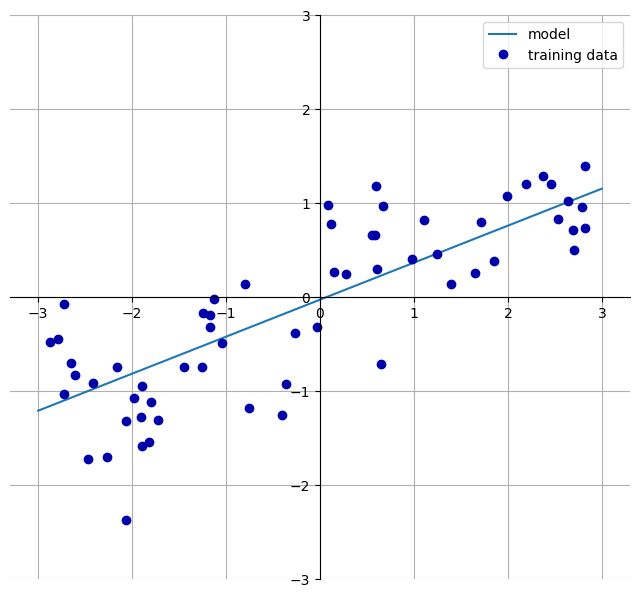

In [1]:
import mglearn
mglearn.plots.plot_linear_regression_wave()

### 최소 제곱법 (OLS, ordinary least squares)
- 가장 간단하고, 오래된 회귀용 선형 알고리즘.
- 평균 제곱 오차 (mean square error)를 최소화하는 w와 b를 찾는다.
    - 예측값과 실제 target 값의 차이의 제곱의 평균
- 매개변수 없음.
    - 모델의 복잡도가 고정되어 있음.

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [4]:
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_: {}".format(lr.coef_))
#앞서 언급된 w
print("lr.intercept_: {}".format(lr.intercept_))
#앞서 언급된 b

#scikit-learn은 훈련 데이터에서 유도된 속성은 끝에 _를 붙여 구분해준다고 함.

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


$R^2$의 값을 보면 그리 좋지는 않다. 0.66이면. 

In [5]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


In [8]:
from mglearn.datasets import load_extended_boston

X, y = load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_: {}".format(lr.coef_))
#앞서 언급된 w
print("lr.intercept_: {}".format(lr.intercept_))
#앞서 언급된 b


print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))


lr.coef_: [-4.12710947e+02 -5.22432068e+01 -1.31898815e+02 -1.20041365e+01
 -1.55107129e+01  2.87163342e+01  5.47040992e+01 -4.95346659e+01
  2.65823927e+01  3.70620316e+01 -1.18281674e+01 -1.80581965e+01
 -1.95246830e+01  1.22025403e+01  2.98078144e+03  1.50084257e+03
  1.14187325e+02 -1.69700520e+01  4.09613691e+01 -2.42636646e+01
  5.76157466e+01  1.27812142e+03 -2.23986944e+03  2.22825472e+02
 -2.18201083e+00  4.29960320e+01 -1.33981515e+01 -1.93893485e+01
 -2.57541277e+00 -8.10130128e+01  9.66019367e+00  4.91423718e+00
 -8.12114800e-01 -7.64694179e+00  3.37837099e+01 -1.14464390e+01
  6.85083979e+01 -1.73753604e+01  4.28128204e+01  1.13988209e+00
 -7.72696840e-01  5.68255921e+01  1.42875996e+01  5.39551110e+01
 -3.21709644e+01  1.92709675e+01 -1.38852338e+01  6.06343266e+01
 -1.23153942e+01 -1.20041365e+01 -1.77243899e+01 -3.39868183e+01
  7.08999816e+00 -9.22538241e+00  1.71980268e+01 -1.27718431e+01
 -1.19727581e+01  5.73871915e+01 -1.75331865e+01  4.10103194e+00
  2.93666477e+0

이것은 오히려 과대적합이 된 경우

### 릿지 (Ridge) 회귀

- 가중치(w)를 선택할 때, 가중치의 절대값을 가능한 작게 만든다는 제약조건(규제 regularization)이 추가된다.
    - 모든 특성이 출력에 주는 영향을 최소한으로 만드는 것. 
    - 이러한 규제를 L2 규제라고 한다.
    - $\alpha \displaystyle\sum_{j=1}^{m}w_j^2$ 항이 추가되는 것. $\alpha$ 값이 클 수록 패널티의 효과가 커지게 된다.

- solver='sag' 옵션: stochastic average gradient descent 의 약자.
    - 대용량 데이터셋의 경우는 이 옵션을 써서 빠르게 처리하도록 할 수 있음.

In [11]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10).fit(X_train, y_train)
#바로 앞의 boston extended
#alpha 값이 커지면 각 계수들 (w)이 0에 더 가까워진다. 기본값은 1

print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


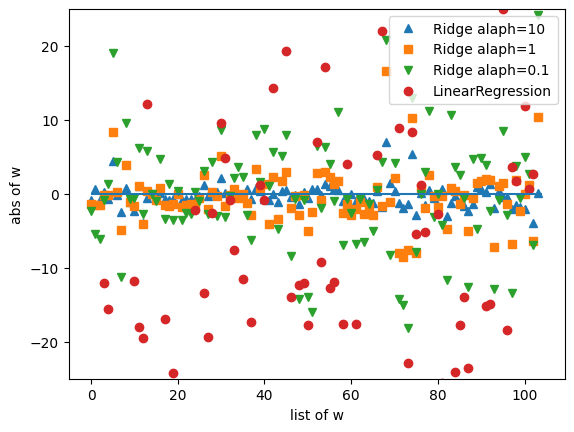

In [12]:
#alpha와 coef_의 속성 관계.
#한 번 이해했으면 별 의미 없는 코드.

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(Ridge(alpha=10).fit(X_train, y_train).coef_, '^', label="Ridge alaph=10")
plt.plot(Ridge(alpha=1).fit(X_train, y_train).coef_, 's', label="Ridge alaph=1")
plt.plot(Ridge(alpha=0.1).fit(X_train, y_train).coef_, 'v', label="Ridge alaph=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("list of w")
plt.ylabel("abs of w")
plt.hlines(0,0,len(lr.coef_))
#수평선 추가.
plt.ylim(-25,25)
plt.legend()

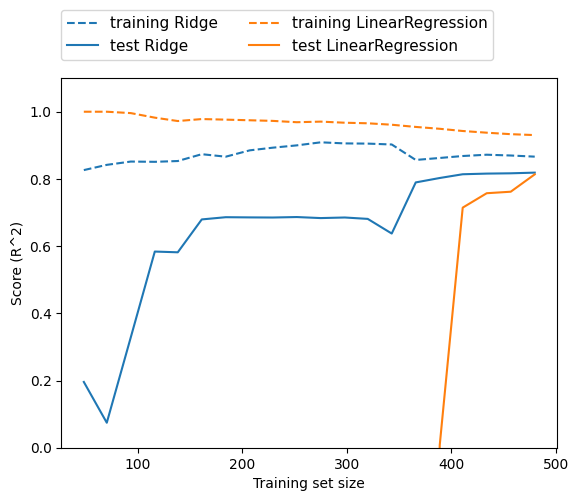

In [13]:
#alpha 값을 고정하고 훈련 data 크기를 변화시킬 경우.
#데이터셋의 크기에 따른 모델의 성능 변화를 나타낸 그래프를 핛브 곡선 (learning curve) 라고 함.
#

mglearn.plots.plot_ridge_n_samples()

#### 데이터 셋의 크기에 변화에 따라서.
- 데이터셋의 크기가 충분히 크면 선형 모델이나 Ridge 모델의 점수가 결국 같아지는 것도 포인트.
- 데이터 수가 많아질수록 선형 회귀의 훈련 데이터 선능이 감소.
    - 데이터가 많아질수록 모델이 데이터를 overfitting하기 어려워지기 때문에.

### 라쏘(Lasso) 회귀
- 계수를 0에 가깝게 만드는 규제가 추가. Ridge처럼
     - L1 규제를 사용함.
     - $\alpha \displaystyle\sum_{j=1}^{m}\lvert w_j \rvert$
          - $\alpha$를 크게 하면 패널티 효과가 커져서 가중치 감소
     - 계수가 완전히 0이 되어서 제외되는 특성이 생기곤 함.
          - feature selection이 자동으로 이루어짐.

In [17]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test,y_test)))
print("사용한 특성의 수: {}".format(sum(1 if coef!=0 else 0 for coef in lasso.coef_)))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 수: 4


Lasso에서 alpha 값을 줄이려면, max_iter 값을 늘려줘야 한다고 함.

alpha 값이 작을술고 가장 작은 오차를 찾아가는 반복 횟수가 많이 필요해지므로.

모델이 수행한 반복 횟수는 Lasso 객체의 n_iter_ 속성에 저장된다고 함.

In [19]:
lasso = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test,y_test)))
print("사용한 특성의 수: {}".format(sum(1 if coef!=0 else 0 for coef in lasso.coef_)))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 수: 33


d:\machine learning study\.venv\for_machine_learning_study\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.690e+01, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(
d:\machine learning study\.venv\for_machine_learning_study\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.440e+02, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(


Text(0, 0.5, 'weights size')

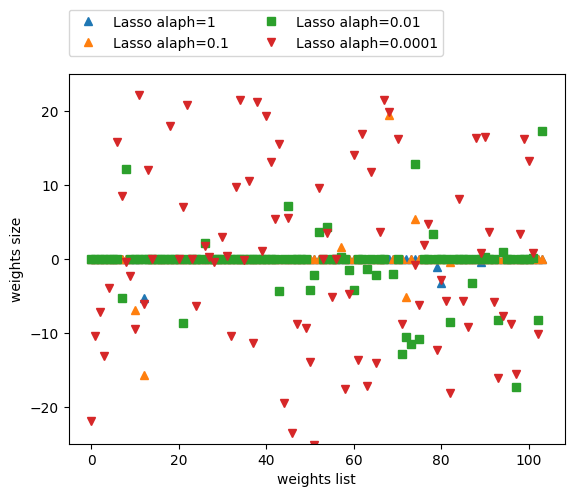

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(Lasso(alpha=1).fit(X_train, y_train).coef_, '^', label="Lasso alaph=1")
plt.plot(Lasso(alpha=0.1).fit(X_train, y_train).coef_, '^', label="Lasso alaph=0.1")
plt.plot(Lasso(alpha=0.01).fit(X_train, y_train).coef_, 's', label="Lasso alaph=0.01")
plt.plot(Lasso(alpha=0.0001).fit(X_train, y_train).coef_, 'v', label="Lasso alaph=0.0001")

plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25,25)
plt.xlabel("weights list")
plt.ylabel("weights size")

### Elastic net
- L1과 L2 규제를 한꺼번에 사용.
- 성능이 좋음.
- 그러나 매개변수가 2개 필요. 

- $l_1 \displaystyle\sum_{j=1}^{m}\lvert w_j \rvert + \frac{1}{2}l_2\displaystyle\sum_{j=1}^{m}w_j^2$